In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt 
from scipy import stats

In [9]:
pd.set_option("display.max_columns",1000)

It's the time to try to know how would had looked Syria without the conflict. As seen in the first notebook thanks the correlations, one of the best indicators of the development of a country is the CO2 emissions. We saw in one of the plots how decreased after 2007.

In [186]:
df_bolivia = pd.read_csv('C:/Users/Usuario/Desktop/TFM/bolivia_clean.csv', index_col=0)
df_morocco = pd.read_csv('C:/Users/Usuario/Desktop/TFM/morocco_clean.csv', index_col=0)
df_syria = pd.read_csv('C:/Users/Usuario/Desktop/TFM/syria_clean.csv', index_col=0)

In [4]:
df_bolivia_subset = df_bolivia.dropna(subset=["Population_total", "CO2_emissions_(kt)"])

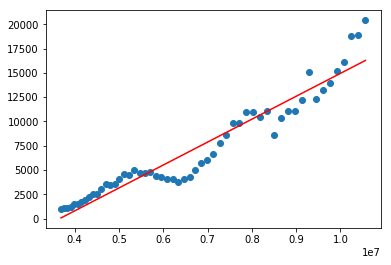

In [7]:
x = df_bolivia_subset["Population_total"]
y = df_bolivia_subset["CO2_emissions_(kt)"]

plt.scatter(x, y)

plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         color='red')
plt.show()

Lack of the data in some indicators, not also in Syria but in Bolivia and Morocco forces us to estimate this data in order to get more accuracy. We have got no CO2 emissions since 2015 in Bolivia and Morocco.

## Bolivia

In [154]:
df_bolivia.tail(5)

,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year
2013,2.027888e+06,83200.0,18918.053,1.351846e+10,8.201283e+09,154098.0,3.065934e+10,2.725505e+10,NaN,1.138640e+10,4803674.0,67.922,3.900072e+09,10425704.0,NaN,3469056.0,6282974.0,648234.0,10400264.0,NaN,3359389.0,7040875.0,2013
2014,3.563044e+06,71200.0,20410.522,1.428507e+10,8.917172e+09,172783.0,3.299619e+10,3.035250e+10,NaN,1.384896e+10,5052899.0,68.357,4.324866e+09,10450341.0,NaN,3474251.0,6418360.0,669548.0,10562159.0,NaN,3374927.0,7187232.0,2014
2015,4.115271e+06,71200.0,NaN,1.018660e+10,9.913846e+09,180951.0,3.300020e+10,3.220842e+10,NaN,1.223137e+10,4857588.0,68.756,3.976500e+09,10162829.0,NaN,3479656.0,6551647.0,693402.0,10724705.0,NaN,3389758.0,7334947.0,2015
2016,3.678739e+06,71200.0,NaN,8.311505e+09,1.101531e+10,287589.0,3.394113e+10,3.349050e+10,NaN,1.083164e+10,4984659.0,69.125,3.818043e+09,10106216.0,NaN,3487635.0,6683948.0,716299.0,10887882.0,NaN,3403770.0,7484112.0,2016
2017,3.302463e+06,NaN,NaN,9.341206e+09,NaN,358680.0,3.750864e+10,3.456886e+10,NaN,1.192794e+10,5093219.0,69.100,4.555274e+09,10963224.0,NaN,3496689.0,6814033.0,740878.0,11051600.0,NaN,3417155.0,7634445.0,2017


We are going to use a Linear Regression to get to know that data. Let's use the population of Bolivia to try to predict that data. 

We will build the model and first check it with data we already know, the emissions in 2014

In [89]:
BOL_CO2_2014 = df_bolivia.at[2014,"CO2_emissions_(kt)"]
print(BOL_CO2_2014)

20410.522


In [75]:
df_bolivia['const'] = 1

In [108]:
reg_bol = sm.OLS(endog=df_bolivia['CO2_emissions_(kt)'], exog=df_bolivia[['const', 'Population_total', "Year"]], missing='drop')
type(reg_bol)

statsmodels.regression.linear_model.OLS

In [109]:
results_bol = reg_bol.fit()
type(results_bol)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [110]:
results_bol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CO2_emissions_(kt)   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     481.6
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.02e-34
Time:                        22:22:52   Log-Likelihood:                -476.32
No. Observations:                  56   AIC:                             958.6
Df Residuals:                      53   BIC:                             964.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9.264e+05   1.94e+05      4.775      0.000    5.37e+05    1.32e+06
Population_total     0.0061      0.001      7.905      0.000       0.005       0.008
Year              -483.0044    100.208     -4.820      0.000    -683.996    -282.013
==============================================================================
Omnibus:                        1.548   Durbin-Watson:                   0.609
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.223
Skew:                           0.144   Prob(JB):                        0.542
Kurtosis:                       2.336   Cond. No.                     8.37e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, let's check how good predict the CO2 for 2014, that we saw above that is 20410.522.

In [151]:
results_bol.predict(exog=[1, df_bolivia.at[2014,"Population_total"], 2014])

array([17501.6599157])

In [103]:
first_acc = (results_bol.predict(exog=[1, df_bolivia.at[2014,"Population_total"], 2014]) - BOL_CO2_2014) / results_bol.predict(exog=[1, df_bolivia.at[2014,"Population_total"], 2014])
print('The accuracy of the regression is %.f' %(first_acc*100) + '%')

The accuracy of the regression is -17%


In [97]:
print('The is accuracy of the regression %.f' %(first_acc*100) + '%')

    - accuracy of the regression -17%


Mmm, not very accurate, a difference of 16,6%. Let's try again but this time adding another indicator to our regression model. Maybe bolivian GNP can help us to get more accurate values.

In [116]:
reg_bol_II = sm.OLS(endog=df_bolivia['CO2_emissions_(kt)'], exog=df_bolivia[['const', 'Population_total',"GDP_(current_US)", "Year"]], missing='drop')
results_bol_II = reg_bol_II.fit()

In [115]:
second_acc = (results_bol_II.predict(exog=[1, df_bolivia.at[2014,"Population_total"], df_bolivia.at[2014,"GDP_(current_US)"], 2014]) - BOL_CO2_2014) / results_bol_II.predict(exog=[1, df_bolivia.at[2014,"Population_total"],df_bolivia.at[2014,"GDP_(current_US)"], 2014])
print('The accuracy of the regression is %.f' %(second_acc*100) + '%')

The accuracy of the regression is -6%


Ok we accept a difference of 6%. Now we fill the cells without data and move forward to the land where to eat with the right hand is synonim of good manners. The left hand is considered *impure* as it is for intimate hygiene, Morocco         ***FUNNY FACTS***

In [188]:
df_bolivia.at[2015,"CO2_emissions_(kt)"] = BOL_CO2_2015
df_bolivia.at[2016,"CO2_emissions_(kt)"] = BOL_CO2_2016
df_bolivia.at[2017,"CO2_emissions_(kt)"] = BOL_CO2_2017

In [189]:
BOL_CO2_2015 = results_bol_II.predict(exog=[1, df_bolivia.at[2015,"Population_total"], df_bolivia.at[2015,"GDP_(current_US)"], 
                                            2015])
BOL_CO2_2016 = results_bol_II.predict(exog=[1, df_bolivia.at[2016,"Population_total"], df_bolivia.at[2016,"GDP_(current_US)"], 
                                            2016])
BOL_CO2_2017 = results_bol_II.predict(exog=[1, df_bolivia.at[2017,"Population_total"], df_bolivia.at[2017,"GDP_(current_US)"], 
                                            2017])

In [190]:
df_bolivia.tail(5)

,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year
2013,2.027888e+06,83200.0,18918.053000,1.351846e+10,8.201283e+09,154098.0,3.065934e+10,2.725505e+10,NaN,1.138640e+10,4803674.0,67.922,3.900072e+09,10425704.0,NaN,3469056.0,6282974.0,648234.0,10400264.0,NaN,3359389.0,7040875.0,2013
2014,3.563044e+06,71200.0,20410.522000,1.428507e+10,8.917172e+09,172783.0,3.299619e+10,3.035250e+10,NaN,1.384896e+10,5052899.0,68.357,4.324866e+09,10450341.0,NaN,3474251.0,6418360.0,669548.0,10562159.0,NaN,3374927.0,7187232.0,2014
2015,4.115271e+06,71200.0,19639.260208,1.018660e+10,9.913846e+09,180951.0,3.300020e+10,3.220842e+10,NaN,1.223137e+10,4857588.0,68.756,3.976500e+09,10162829.0,NaN,3479656.0,6551647.0,693402.0,10724705.0,NaN,3389758.0,7334947.0,2015
2016,3.678739e+06,71200.0,20154.295091,8.311505e+09,1.101531e+10,287589.0,3.394113e+10,3.349050e+10,NaN,1.083164e+10,4984659.0,69.125,3.818043e+09,10106216.0,NaN,3487635.0,6683948.0,716299.0,10887882.0,NaN,3403770.0,7484112.0,2016
2017,3.302463e+06,NaN,21167.043209,9.341206e+09,NaN,358680.0,3.750864e+10,3.456886e+10,NaN,1.192794e+10,5093219.0,69.100,4.555274e+09,10963224.0,NaN,3496689.0,6814033.0,740878.0,11051600.0,NaN,3417155.0,7634445.0,2017


## Morocco

The same for our north african country

In [35]:
df_morocco['const'] = 1

In [38]:
reg_mor = sm.OLS(endog=df_morocco['CO2_emissions_(kt)'], exog=df_morocco[['const', 'Population_total', "Year"]], missing='drop')

In [39]:
results_mor = reg_mor.fit()

In [40]:
results_mor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     CO2_emissions_(kt)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     538.9
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.73e-35
Time:                        19:38:37   Log-Likelihood:                -530.69
No. Observations:                  55   AIC:                             1067.
Df Residuals:                      52   BIC:                             1073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.303e+06   1.35e+06     -4.680      0.000      -9e+06    -3.6e+06
Population_total    -0.0052      0.002     -3.122      0.003      -0.009      -0.002
Year              3245.8656    697.344      4.655      0.000    1846.543    4645.188
==============================================================================
Omnibus:                        7.531   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.793
Skew:                           0.918   Prob(JB):                       0.0203
Kurtosis:                       2.818   Cond. No.                     6.25e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
df_morocco.tail(5)

,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year,const
2013,6507408.0,245800.0,59082.704,3.501493e+10,3.926330e+10,843940.0,1.068256e+11,1.058164e+11,NaN,5.046755e+10,12003223.0,75.026,3.417300e+10,42423794.0,NaN,9438879.0,22284898.0,2100992.0,33824769.0,4819.0,13631382.0,20193387.0,2013,1
2014,6976810.0,245800.0,59863.775,3.772516e+10,4.280948e+10,993451.0,1.098814e+11,1.062497e+11,NaN,5.147330e+10,12198022.0,75.309,3.403400e+10,44114534.0,0.618,9541974.0,22622915.0,2153193.0,34318082.0,5449.0,13639379.0,20678703.0,2014,1
2015,7043971.0,245800.0,NaN,3.449771e+10,4.299039e+10,1147533.0,1.005933e+11,1.066936e+11,NaN,4.233463e+10,12357082.0,75.573,3.191230e+10,43079696.0,NaN,9626407.0,22950840.0,2226075.0,34803322.0,5507.0,13639770.0,21163552.0,2015,1
2016,7738637.0,245800.0,NaN,3.635575e+10,4.626466e+10,1255428.0,1.036063e+11,1.029377e+11,NaN,4.696538e+10,12541812.0,75.821,3.263180e+10,41513933.0,NaN,9726617.0,23237448.0,2312721.0,35276786.0,5208.0,13630950.0,21645836.0,2016,1
2017,8436970.0,NaN,NaN,4.013671e+10,NaN,1378867.0,1.091395e+11,1.039106e+11,NaN,5.094697e+10,12714484.0,NaN,3.384518e+10,43916066.0,NaN,9790066.0,23530251.0,2419263.0,35739580.0,NaN,13613921.0,22125659.0,2017,1


In [ ]:
df_bolivia[2014] = results_bol.predict(exog=[1, 10562159.0, 2014])
df_bolivia[2015] = results_bol.predict(exog=[1, df_bolivia[2015], 2015])
df_bolivia[2016] = results_bol.predict(exog=[1, df_bolivia[2016], 2016])
df_bolivia[2017] = results_bol.predict(exog=[1, df_bolivia[2017], 2017])

## Syria

Using this method we can predict the Syrian GDP until 2014. We are going to add Urban population indicator to get more accuracy this time. As said previously, with the start of the war this indicator stopped showing data.
Let's hope that this method adjust to reality because Syrian GDP almost doubled itself from 2003 to 2007.

Our regression is not intelligent enough to know that in 2008 started a world financial crisis so we will compare the results using Morocco and Bolivia

METER CALCULO ENTRE 2003 Y 2007 PARA EL GDP

In [42]:
df_syria.tail(15)

,Air_transport_passengers_carried,Armed_forces_personnel_total,CO2_emissions_(kt),Exports_of_goods_and_services_(current_US),External_debt_stocks_total_(DOD_current_US),Fixed_broadband_subscriptions,GDP_(current_US),GNI_Atlas_method_(current_US),Hospital_beds_(per_1000_people),Imports_of_goods_and_services_(current_US),Labor_force_total,Life_expectancy_at_birth_total_(years),Military_expenditure_(current_LCU),Mobile_cellular_subscriptions,Physicians_(per_1000_people),Population_ages_0_14_total,Population_ages_15_64_total,Population_ages_65_and_above_total,Population_total,Railways_passengers_carried_(million_passenger_km),Rural_population,Urban_population,Year
2003,9.078500e+05,427000.0,54275.267,7.305995e+09,0.000000e+00,NaN,2.182814e+10,2.152621e+10,1.50,6.235989e+09,5137966.0,73.967,6.711700e+10,1185000.0,1.414,6938174.0,9894697.0,582395.0,17415266.0,528.0,8176642.0,9238624.0,2003
2004,1.169646e+06,415000.0,51103.312,1.004842e+10,0.000000e+00,600.0,2.508693e+10,2.453095e+10,1.30,9.987584e+09,5158202.0,74.250,7.020900e+10,2346000.0,1.465,7019483.0,10190304.0,596851.0,17806638.0,635.0,8294866.0,9511772.0,2004
2005,1.239825e+06,416000.0,50626.602,1.165552e+10,0.000000e+00,2700.0,2.885897e+10,2.765320e+10,NaN,1.201245e+10,5196070.0,74.430,7.572000e+10,2950000.0,1.558,7154765.0,10523980.0,615866.0,18294611.0,607.0,8455403.0,9839208.0,2005
2006,1.252102e+06,401000.0,53582.204,1.316800e+10,0.000000e+00,5218.0,3.333284e+10,3.095353e+10,1.40,1.290758e+10,5309963.0,74.412,7.492400e+10,4675000.0,0.530,7272364.0,11002425.0,640188.0,18914977.0,571.2,8673274.0,10241703.0,2006
2007,1.371450e+06,401000.0,66468.042,1.561389e+10,0.000000e+00,6957.0,4.040501e+10,3.617600e+10,1.47,1.528644e+10,5428457.0,74.152,8.274200e+10,6234682.0,1.523,7449359.0,11515508.0,667939.0,19632806.0,744.2,8930767.0,10702039.0,2007
2008,1.358473e+06,401000.0,67681.819,NaN,5.385427e+09,11055.0,NaN,NaN,1.54,NaN,5668789.0,73.648,8.682700e+10,7056158.0,1.528,7625406.0,12004837.0,695200.0,20325443.0,1120.2,9171856.0,11153587.0,2008
2009,1.342518e+06,403000.0,62331.666,NaN,5.685286e+09,34657.0,NaN,NaN,1.50,NaN,5636492.0,72.939,1.014640e+11,10021861.0,1.455,7709758.0,12398439.0,716696.0,20824893.0,1120.0,9321847.0,11503046.0,2009
2010,1.158366e+06,403000.0,61605.600,NaN,5.274703e+09,69817.0,NaN,NaN,1.50,NaN,5758877.0,72.108,1.089070e+11,11696000.0,1.505,7643826.0,12645812.0,729196.0,21018834.0,1120.2,9332362.0,11686472.0,2010
2011,1.433767e+06,178000.0,56908.173,NaN,4.979355e+09,121300.0,NaN,NaN,NaN,NaN,5663260.0,71.270,1.202910e+11,12917000.0,NaN,7688719.0,12430359.0,744915.0,20863993.0,1857.0,9476426.0,11387567.0,2011
2012,9.079277e+05,178000.0,44730.066,NaN,4.747401e+09,242154.0,NaN,NaN,1.50,NaN,5480978.0,70.549,NaN,12980000.0,NaN,7608391.0,12063020.0,749290.0,20420701.0,1857.0,9484395.0,10936306.0,2012


In [43]:
df_syria['const'] = 1

In [44]:
reg_syr = sm.OLS(endog=df_syria['GDP_(current_US)'], exog=df_syria[['const', 'CO2_emissions_(kt)', "Urban_population", "Year"]], missing='drop')

In [45]:
results_syr = reg_syr.fit()

In [46]:
results_syr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       GDP_(current_US)   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     65.12
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           3.20e-16
Time:                        19:55:43   Log-Likelihood:                -1127.1
No. Observations:                  48   AIC:                             2262.
Df Residuals:                      44   BIC:                             2270.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                3.65e+11   6.02e+11      0.606      0.547   -8.48e+11    1.58e+12
CO2_emissions_(kt)  3.549e+04   1.41e+05      0.251      0.803   -2.49e+05     3.2e+05
Urban_population    3820.7544   1416.860      2.697      0.010     965.260    6676.248
Year               -1.888e+08   3.07e+08     -0.614      0.542   -8.08e+08    4.31e+08
==============================================================================
Omnibus:                        7.486   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.679
Skew:                           0.888   Prob(JB):                       0.0355
Kurtosis:                       3.429   Cond. No.                     6.14e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.14e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
results_syr.predict(exog=[1, 11503046.0, 62331.666, 2009])

array([3.9430618e+11])

Now that we have been able to put some extra data fo our data frames let's simply get to our main objective, that was "predict" the situation for Syria in those years after the begin of the conflict.

## How are we going to do it?

As we saw in the first Notebook of Data_treatment, and inside a frame with thousands of economical or cultural pecualirities that make the difference between these and all the countries in the world, Bolivia's and Morocco's evolution, development and situation at the moment when the conflict start are similar to Syria.

Then we will use these countries' regressions and divide it by two. It may sound weird or too simple for such importance of data but let's check it with some data we already know about Syria.

In [50]:
SYR_UP_2014 = df_syria.at[2014,"Urban_population"]
print(SYR_UP_2014)

9889591.0


In [51]:
(results_bol.predict(exog=[1, SYR_UP_2014, 2014]) + results_mor.predict(exog=[1, SYR_UP_2014, 2014])) / 2

array([97969.62831113])

That was close! 